# XML. Что это?

Аббревиатура **XML** расшифровывается как **eXtensible Markup Language** — расширяемый язык разметки. Он (язык) позволяет описывать документы, используя теги.

Если вы когда-нибудь сталкивались с HTML, языком разметки для создания веб-страниц, то можете заметить, что XML очень похож на него. Однако в отличие от HTML, где теги заранее чётко заданы, в XML мы можем задавать теги сами.

Например, если мы хотим описать меню в ресторане в формате XML-документа, мы можем сделать это так:

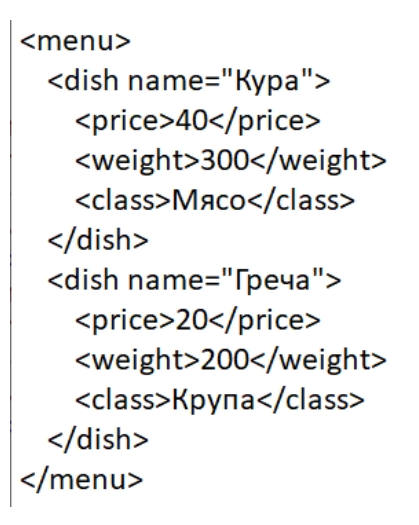

В примере выше довольно жёсткая структура: у нас есть меню  — тег ``<menu>``, где хранятся объекты, то есть конкретные блюда, помеченные тегом ``<dish>``. У каждого из блюд есть параметр name, в котором прописано имя блюда. Можно считать, что ``<dish>`` — класс этого объекта.

Внутри каждого объекта-блюда находится набор значений, которые тоже задаются тегами. Например, внутри тега ``<price>`` находится значение 20, означающее цену данного блюда. Тег ``<price>`` и другие теги внутри можно рассматривать как атрибуты класса dish.

*Файлы XML не всегда имеют жёсткую структуру и не обязаны её иметь, но чаще всего какая-то структура внутри файла будет. Почему? Потому что обычно XML не пишут вручную. Такие файлы генерируются кодом и читаются тоже кодом. Поэтому при наличии понятной структуры обработка файла становится намного проще.*

## ИЗВЛЕКАЕМ КОНТЕНТ ИЗ XML-ФАЙЛА

Данные в формате XML имеют древовидную структуру. 

``Что такое дерево? Это структура, которая имеет узлы и связи между ними. Самый верхнеуровневый узел называется корнем, а всё, что находится в самом низу, называется листьями.``

В примере из прошлого юнита корнем является ``<menu>``, а листьями, например, ``<price>`` и ``<weight>``.

Кроме того, у ``<menu>`` есть дети (потомки) — это два узла ``<dish>``, имеющие разное значение атрибута ``<name>``.

Таким образом, в файле используется набор тегов, внутри которых могут находиться другие теги со своими значениями.

Для работы с XML-файлами мы будем использовать модуль ElementTree , входящий в стандартный пакет xml. Этот модуль позволит нам «перемещаться» по дереву XML и смотреть, что находится в каждом его узле, начиная с корня и заканчивая листьями.

Импортируем этот модуль под псевдонимом ET: 

In [13]:
# Импортируем модуль ElementTree
import xml.etree.ElementTree as ET

Для работы со структурой файла menu.xml считаем его содержимое в переменную tree, выполнив код:

In [14]:
tree = ET.parse('data/menu.xml')

### КОРЕНЬ

Запишем в переменную **root** корневой узел дерева **tree** и посмотрим, как выглядит содержимое переменной **root**, для чего выполним код:

In [24]:
root = tree.getroot()
root

<Element 'menu' at 0x00000221062B6E80>

Мы видим, что в корне находится **'menu'**. Всё правильно, мы и предполагали увидеть именно это. 

Какой тип у этого объекта? Если мы вызовем встроенный в Python метод **type()** и передадим ему root , то увидим, что это тип ``xml.etree.ElementTree.Element``. Такой тип будет у любого узла в дереве.

In [25]:
len(root)

2

Итак, использование **list(root)** возвращает список потомков указанного узла. У узла root, который представляет меню, два потомка, а именно — два блюда, которые представлены тегами dish.

Для того чтобы получить список потомков второго блюда в нашем меню и вывести его на экран, выполним код:

In [26]:
list(root[1])

[<Element 'price' at 0x00000221062B7150>,
 <Element 'weight' at 0x00000221062B71A0>,
 <Element 'class' at 0x00000221062B71F0>]

Таким образом, у второго потомка узла root —  три потомка.

### АТРИБУТЫ И ТЕГИ

Как было сказано ранее, у узлов могут быть параметры, или атрибуты. Например, у узлов dish есть атрибут name, который хранит название блюда.

Мы можем непосредственно обратиться к атрибутам, используя **attrib**.

Выведем на экран атрибуты первого блюда из меню:

In [18]:
root[0].attrib

{'name': 'Кура'}

В XML-узлах часто хранятся количественные показатели. Эти показатели хранятся в виде текста, и прочитать их можно, обратившись к атрибуту text у соответствующего объекта типа ElementTree.Element.

Например, возьмём узел price первого блюда из меню:

In [20]:
root[0][0]

<Element 'price' at 0x00000221062B6F20>

Теперь прочитаем значение этого узла с помощью text:

In [21]:
root[0][0].text

'40'

Все значения в XML, даже числовые, хранятся как строки, поэтому преобразовывать их к нужному типу вам нужно самим.

Например, в данном случае можно обернуть значение стоимости в **int()** или **float()**.

Если вы хотите прочитать наименование тега конкретного узла, необходимо использовать tag. Например, получим наименование тега корневого узла:

In [22]:
root.tag

'menu'

### ИСПОЛЬЗОВАНИЕ ЦИКЛОВ

Итак, мы научились обращаться к отдельным узлам дерева, представляющего XML-структуру, и извлекать информацию о его атрибутах, значении и потомках.

На этом шаге мы решим задачу вывода на экран наименование всех блюд из меню, а также информацию о них (иными словами, нам необходимо обойти дерево и вывести на экран значения его листьев).

Используя цикл for, автоматизируем обход дерева. Для этого напишем следующий код:

In [23]:
for dish in root:
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()

Кура price 40
Кура weight 300
Кура class Мясо

Греча price 20
Греча weight 200
Греча class Крупа



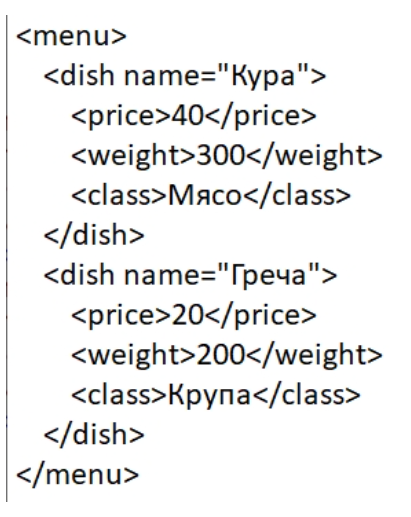

## ЗАГРУЖАЕМ ДАННЫЕ ИЗ XML-ФАЙЛА В DATAFRAME

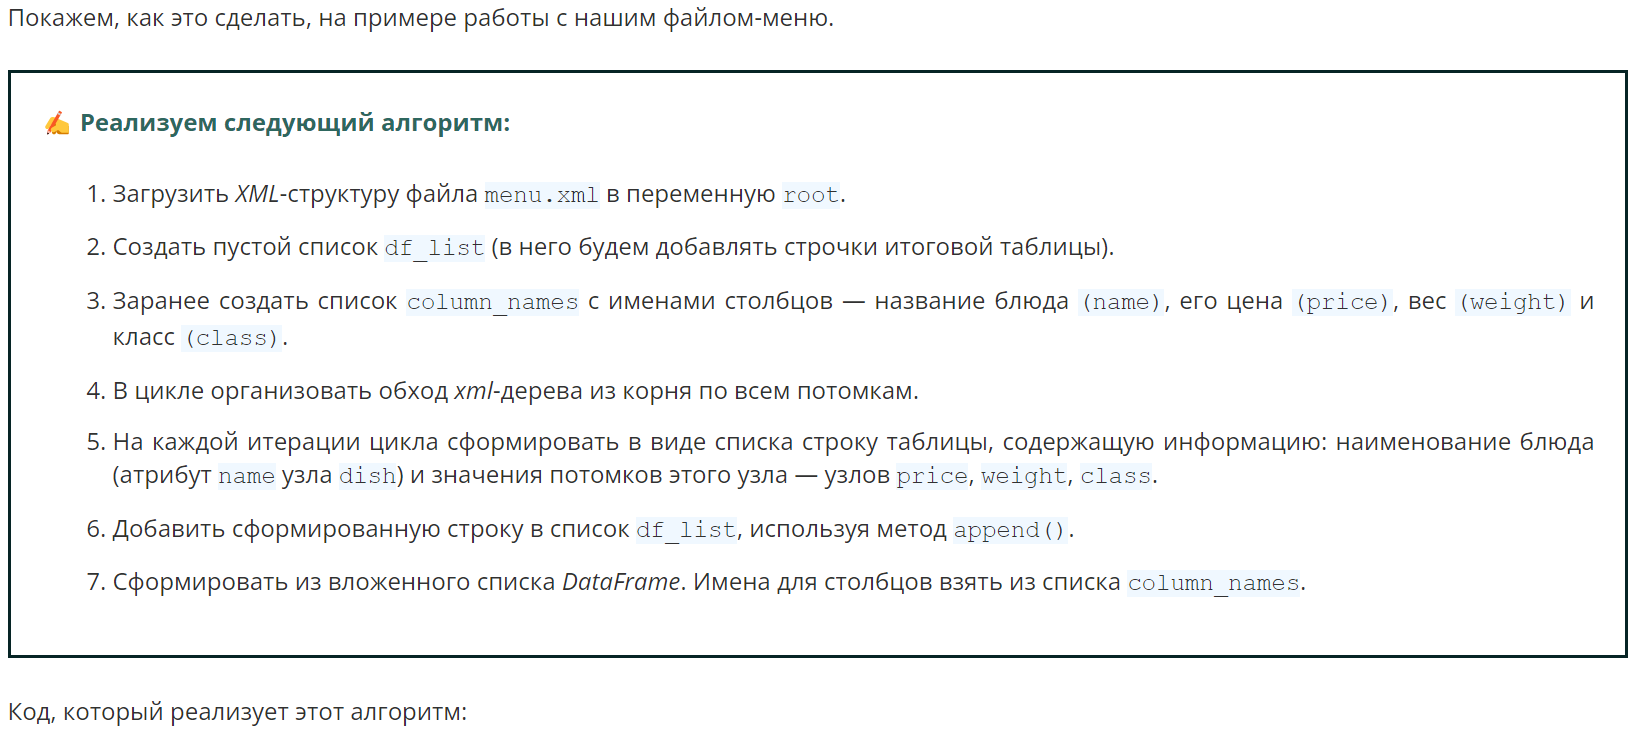

In [28]:
import pandas as pd

In [34]:
tree = ET.parse('data/menu.xml')
root = tree.getroot()

column_names = ['name', 'price', 'weight', 'class']
df_list = []

for dish in root:
    row = [dish.attrib['name'], dish[0].text, dish[1].text, dish[2].text]
    df_list.append(row)
    df = pd.DataFrame(df_list, columns=column_names)
display(df)

,name,price,weight,class
0,Кура,40,300,Мясо
1,Греча,20,200,Крупа


### СОЗДАЁМ XML-ФАЙЛ

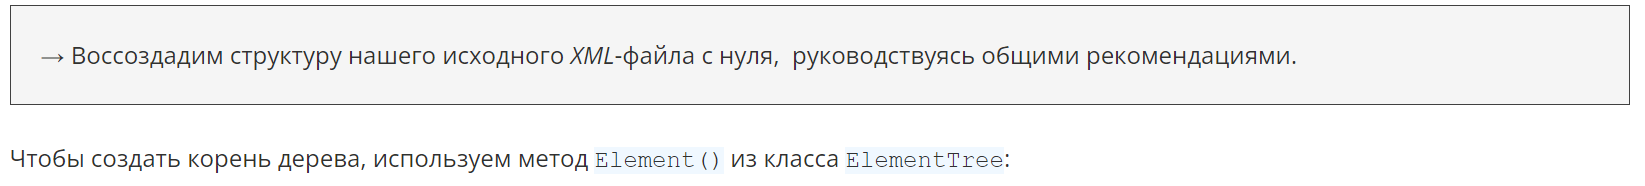

In [35]:
new_root = ET.Element('menu')
display(new_root)

<Element 'menu' at 0x0000022104ADF4C0>

Теперь мы можем добавлять новые узлы в наше дерево, используя метод **SubElement()** из того же класса.

Добавим в наше меню двух потомков корневого узла, которые будут представлять два блюда, то есть будут узлами dish:

In [36]:
dish1 = ET.SubElement(new_root, 'dish', name='Кура')

dish2 = ET.SubElement(new_root, 'dish', name='Греча')

display(list(new_root))

[<Element 'dish' at 0x000002211D6051C0>,
 <Element 'dish' at 0x000002211D605210>]

В метод SubElement() мы передали первым аргументом узел, к которому добавляем потомка, вторым аргументом — наименование нового тега (dish),  третьим аргументом — наименование атрибута нового узла( name ) и его значение.

Аналогичным образом можно добавлять новые узлы к любым существующим узлам, не только к корню.

Добавим в создаваемую структуру по три потомка (атрибута) к двум новым узлам, которые будут содержать информацию о блюде — о его цене (price), весе (weight) и классе (class), а также значение этих атрибутов:

In [37]:
price1 = ET.SubElement(dish1, "price").text = "40"
weight1 = ET.SubElement(dish1, "weight").text = "300"
class1 = ET.SubElement(dish1, "class").text = "Мясо"
display(list(dish1))

price2 = ET.SubElement(dish2, "price").text = "20"
weight2 = ET.SubElement(dish2, "weight").text = "200"
class2 = ET.SubElement(dish2, "class").text = "Крупа"
display(list(dish2))

[<Element 'price' at 0x0000022105FA1710>,
 <Element 'weight' at 0x000002211D606340>,
 <Element 'class' at 0x000002211D6063E0>]

[<Element 'price' at 0x000002210631F510>,
 <Element 'weight' at 0x000002211D5F67A0>,
 <Element 'class' at 0x000002211D5F75B0>]

Проверим визуально корректность созданной нами структуры, выполнив фрагмент кода, разработанного ранее:

In [38]:
for dish in new_root:    
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()

Кура price 40
Кура weight 300
Кура class Мясо

Греча price 20
Греча weight 200
Греча class Крупа



Созданная нами структура полностью идентична структуре исходного XML-файла.

В финале работы с файлом XML-формата запишем созданную нами структуру как XML-файл на диск.

Преобразуем созданный нами объект типа ElementTree.Element в строку c помощью метода tostring(), передав наше новое дерево как аргумент. Сохраним эту строку на диске, используя стандартные средства Python::

In [40]:
new_root_string = ET.tostring(new_root)

with open("data/new_menu.xml", "wb") as f:
    f.write(new_root_string)